**The following study, trying to find a recurrent neural network capable of predicting the number of customers who visit a store, and the amount of sales per month, was able to reach an accuracy of 94 percent.**

Since the dataset does not include a large number of records (the available records are not enough), and therefore we need to follow a specific methodology through which we can reach the desired result, the methodology that was followed in this study focuses on the following steps:

*1- Attempting to find a mathematical formula through which the number of customers who visit the store can be linked to the amount of sales the store gets:*

The mathematical relationship here, depends on the use of unsupervised learning in a case to collect data into a number of clusters (20 clusters were adopted), where kmeans will be used to collect data on the number of customers and the amount of sales and try to aggregate them into 20 clusters.

At this point, a new column will be generated that includes the aggregation process that has been accessed and that includes data whose value ranges between 0 and 19.

Thus, at this stage, we were able to simplify the sorting process, moving from regression to classification.

We reviewed the chart that shows the sorting of data (the number of customers and the amount of sales), so that it shows the groups (clusters) in addition to identifying the centers of those clusters.

*2- The second stage, which includes trying to approximate the values ​​of the remaining two columns, which are the main criteria in the classification process, where StandardScaler was used for this task.*

*3- Suggesting a structure for a recurrent neural network through which the relationship between the store space and the number of items in the store can be studied, in order to identify the number of customers who can visit the store and the amount of sales that can be obtained.*

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as op
op.download("https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kaledhoshme
Your Kaggle Key: ··········


100%|██████████| 9.60k/9.60k [00:00<00:00, 3.64MB/s]

In [898]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [833]:
class Store_Daily_Customer_Count:
  def __init__(self, dataset, epoch):
    self.dataset = dataset
    self.epoch = epoch
  def readCSV(self):
    self.datasetObject = pd.read_csv(os.path.join(self.dataset))
    self.datasetObject = self.datasetObject.drop(['Store ID '], axis = 1)
  def featuresTarget(self, targetColumn):
    self.features = np.asarray(self.datasetObject.drop([targetColumn], axis = 1))
    self.label = np.asarray(self.datasetObject[targetColumn])
  def StandardScaler(self):
    self.scaler = StandardScaler()
  def fitScaler(self):  
    self.scaler.fit(self.features)
  def TransformFeatures(self):  
    self.features = self.scaler.transform(self.features)
  def Train_test_splitDataset(self, test_size):
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.features, 
                                                                            self.label, 
                                                                            test_size = test_size,
                                                                            random_state= 300)
  def model(self, classes_):
    m = tf.keras.models.Sequential()
    m.add(tf.keras.layers.Dense(512, activation = "relu",
                              input_shape = (self.features.shape[1], 1)))
    m.add(tf.keras.layers.LSTM(512, return_sequences= True))
    m.add(tf.keras.layers.LSTM(512, return_sequences= True))
    m.add(tf.keras.layers.GlobalAveragePooling1D())
    m.add(tf.keras.layers.Dropout(0.4))
    m.add(tf.keras.layers.Dense(classes_, activation = "softmax"))
    self.m = m 
  def compile(self):
    self.m.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])
  def fitModel(self):
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=700, mode = 'min', restore_best_weights=True)
    self.history = self.m.fit(self.features, self.label, epochs = self.epoch, batch_size = 16,
                              callbacks = [callback])  


In [834]:
dataset_path = os.path.join("stores-area-and-sales-data","Stores.csv")

In [835]:
Store_Daily_Customer_Count = Store_Daily_Customer_Count(dataset_path, 10000)

In [836]:
Store_Daily_Customer_Count.readCSV()

In [837]:
Store_Daily_Customer_Count.datasetObject.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [838]:
Store_Daily_Customer_Count.datasetObject.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [839]:
Store_Daily_Customer_Count.datasetObject.isna().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [840]:
Store_Daily_Customer_Count.datasetObject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


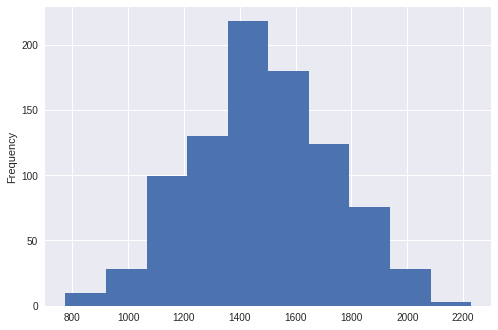

In [841]:
Store_Daily_Customer_Count.datasetObject['Store_Area'].plot.hist()

In [842]:
Store_Daily_Customer_Count.datasetObject.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


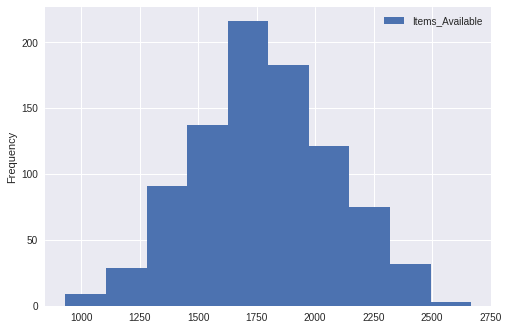

In [843]:
Store_Daily_Customer_Count.datasetObject[['Items_Available']].plot.hist()

In [844]:
Store_Daily_Customer_Count.datasetObject = Store_Daily_Customer_Count.datasetObject.astype("float64")

In [845]:
Store_Daily_Customer_Count.datasetObject.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659.0,1961.0,530.0,66490.0
1,1461.0,1752.0,210.0,39820.0
2,1340.0,1609.0,720.0,54010.0
3,1451.0,1748.0,620.0,53730.0
4,1770.0,2111.0,450.0,46620.0


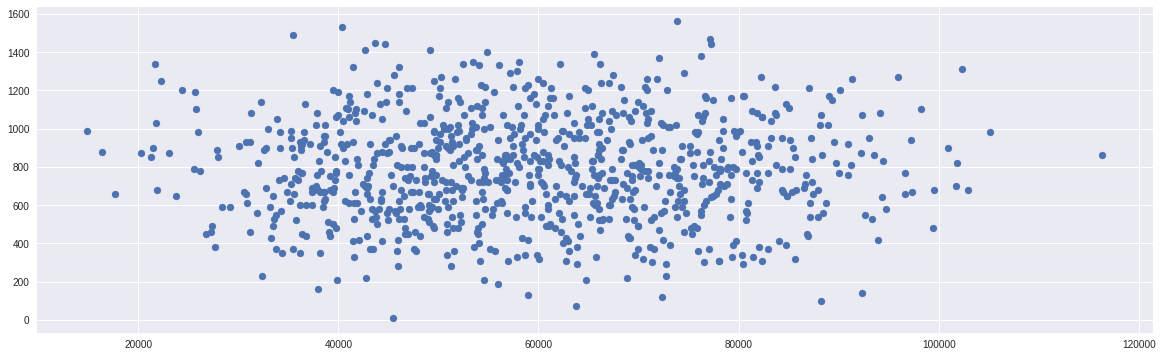

In [846]:
# relation between Daily_Customer_Count &	Store_Sales
plt.figure(figsize = (20, 6))
plt.scatter(Store_Daily_Customer_Count.datasetObject['Store_Sales'],
         Store_Daily_Customer_Count.datasetObject['Daily_Customer_Count'])
plt.show()

In [847]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=20, random_state=0).fit(Store_Daily_Customer_Count.datasetObject[['Store_Sales','Daily_Customer_Count']])

In [848]:
kmeans.labels_

array([12, 14, 16, 16, 19, 19,  3,  1, 19,  7,  9, 11,  0, 11, 12, 15, 15,
        1, 12, 14,  7,  9, 16,  4,  7,  9,  6,  0, 15,  8,  2, 10,  0,  3,
        3, 19, 14,  0, 16, 19,  4, 19,  9, 14,  1,  4, 12,  0,  0, 15,  2,
       11,  9, 12, 12,  4, 12,  2,  9, 16,  9, 19,  4, 12, 11,  9,  4,  3,
       18,  7, 11, 18, 12,  3,  8,  2,  6, 12, 14, 12, 14,  8, 11,  7, 13,
        4,  5, 14, 19,  7, 12, 12, 16, 11, 15,  4,  0,  0, 12, 14, 15, 12,
        8, 13,  4, 12,  9, 15,  6,  1,  4,  0, 11, 19, 19, 12,  2, 18, 11,
        4, 12, 18, 19,  2,  1,  2,  0,  4,  2,  9, 11,  3,  4, 14, 16,  7,
        0,  0, 15,  8,  4,  3,  4,  4,  0,  4, 11,  4,  1,  4, 14, 12,  8,
        6,  1,  9,  3, 18,  7, 16,  4, 19,  9,  2,  1, 19,  5, 14,  4,  9,
        7, 15, 19, 18,  7,  7,  9,  3, 19, 11,  3, 14,  9, 12, 15, 18, 14,
        7,  9, 14,  2,  9,  9, 12, 16,  8, 12, 15,  0,  4,  3,  3,  9, 18,
       11,  1,  4,  0,  1, 16, 16,  9,  3, 15, 15, 18, 12, 11,  9,  3,  0,
       18, 12,  6,  9, 13

In [849]:
labels_centered = kmeans.cluster_centers_

In [850]:
labels_centered

array([[ 61065.77464789,    800.70422535],
       [ 36508.60465116,    754.41860465],
       [ 81652.95454545,    805.22727273],
       [ 73326.47058824,    740.19607843],
       [ 50036.62162162,    790.81081081],
       [100619.09090909,    841.81818182],
       [ 26659.33333333,    759.33333333],
       [ 43322.        ,    797.        ],
       [ 86743.65853659,    762.92682927],
       [ 69665.48387097,    779.19354839],
       [ 20239.09090909,    938.18181818],
       [ 57209.84848485,    799.84848485],
       [ 65499.74025974,    793.11688312],
       [ 93092.85714286,    806.66666667],
       [ 39927.4       ,    811.4       ],
       [ 77373.66666667,    790.33333333],
       [ 53501.53846154,    828.30769231],
       [116320.        ,    860.        ],
       [ 32605.17241379,    712.75862069],
       [ 46563.33333333,    722.40740741]])

In [894]:
import random
def generate_colors_list(labels, number_cluster):
  color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in
  range(6)]) for i in range(number_cluster)]
  arr = [color[value] for index, value in enumerate(labels)]
  return arr  

In [895]:
colors = generate_colors_list(kmeans.labels_, 20)

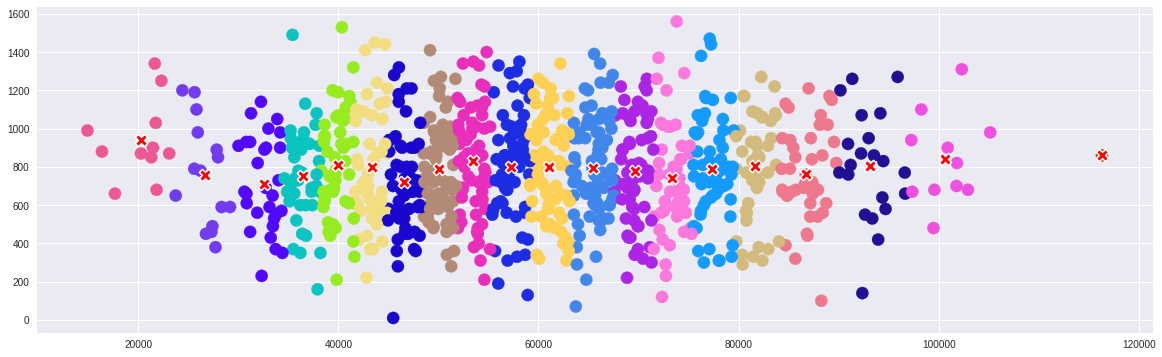

In [893]:
import matplotlib as mpl
mpl.style.use('seaborn')
plt.figure(figsize = (20, 6))
plt.scatter(Store_Daily_Customer_Count.datasetObject['Store_Sales'],
            Store_Daily_Customer_Count.datasetObject['Daily_Customer_Count'], 
            c = colors, s=150)
plt.scatter(labels_centered[:, 0], labels_centered[:, 1], marker='X', s=150, linewidths=1.5, color='red', edgecolors="white", lw=1.5)
plt.show()

In [816]:
Store_Daily_Customer_Count.datasetObject['Store_Sales&Daily_Customer_Count'] = kmeans.labels_

In [817]:
Store_Daily_Customer_Count.datasetObject.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Sales&Daily_Customer_Count
0,1659.0,1961.0,530.0,66490.0,12
1,1461.0,1752.0,210.0,39820.0,14
2,1340.0,1609.0,720.0,54010.0,16
3,1451.0,1748.0,620.0,53730.0,16
4,1770.0,2111.0,450.0,46620.0,19


In [819]:
Store_Daily_Customer_Count.datasetObject['Store_Sales&Daily_Customer_Count'].describe()

count    896.000000
mean       9.199777
std        5.830113
min        0.000000
25%        4.000000
50%        9.000000
75%       14.000000
max       19.000000
Name: Store_Sales&Daily_Customer_Count, dtype: float64

In [820]:
Store_Daily_Customer_Count.datasetObject = Store_Daily_Customer_Count.datasetObject.drop(['Store_Sales', 'Daily_Customer_Count'],
                                                                                         axis = 1)

In [821]:
Store_Daily_Customer_Count.datasetObject.head()

,Store_Area,Items_Available,Store_Sales&Daily_Customer_Count
0,1659.0,1961.0,12
1,1461.0,1752.0,14
2,1340.0,1609.0,16
3,1451.0,1748.0,16
4,1770.0,2111.0,19


In [823]:
Store_Daily_Customer_Count.datasetObject.groupby('Store_Sales&Daily_Customer_Count').count()

,Store_Area,Items_Available
Store_Sales&Daily_Customer_Count,,
0,69,69
1,43,43
2,43,43
3,50,50
4,74,74
5,11,11
6,15,15
7,50,50
8,41,41


In [750]:
Store_Daily_Customer_Count.featuresTarget('Store_Sales&Daily_Customer_Count')

In [751]:
Store_Daily_Customer_Count.label = to_categorical(Store_Daily_Customer_Count.label)

In [754]:
Store_Daily_Customer_Count.StandardScaler()

In [755]:
Store_Daily_Customer_Count.fitScaler()

In [756]:
Store_Daily_Customer_Count.TransformFeatures()

In [757]:
Store_Daily_Customer_Count.features

array([[ 0.69409138,  0.59713547],
       [-0.09760039, -0.10021771],
       [-0.58141204, -0.57735409],
       ...,
       [-1.1411941 , -1.15458901],
       [-0.74534821, -0.74084837],
       [-1.24515363, -1.17794534]])

In [758]:
Store_Daily_Customer_Count.features.shape

(896, 2)

In [760]:
Store_Daily_Customer_Count.model(20)

In [761]:
Store_Daily_Customer_Count.compile()

In [762]:
Store_Daily_Customer_Count.m.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 2, 512)            1024      
                                                                 
 lstm_34 (LSTM)              (None, 2, 512)            2099200   
                                                                 
 lstm_35 (LSTM)              (None, 2, 512)            2099200   
                                                                 
 global_average_pooling1d_1   (None, 512)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_37 (Dense)            (None, 20)                10260     
                                                     

In [763]:
Store_Daily_Customer_Count.fitModel()

Streaming output truncated to the last 5000 lines.
56/56 [==============================] - 0s 5ms/step - loss: 0.7556 - accuracy: 0.7254
Epoch 2168/10000
56/56 [==============================] - 0s 5ms/step - loss: 0.7240 - accuracy: 0.7388
Epoch 2169/10000
56/56 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 0.7355
Epoch 2170/10000
56/56 [==============================] - 0s 5ms/step - loss: 0.6052 - accuracy: 0.7623
Epoch 2171/10000
56/56 [==============================] - 0s 5ms/step - loss: 0.7990 - accuracy: 0.7065
Epoch 2172/10000
56/56 [==============================] - 0s 5ms/step - loss: 0.8798 - accuracy: 0.7165
Epoch 2173/10000
56/56 [==============================] - 0s 5ms/step - loss: 0.6083 - accuracy: 0.7824
Epoch 2174/10000
56/56 [==============================] - 0s 5ms/step - loss: 0.5750 - accuracy: 0.7879
Epoch 2175/10000
56/56 [==============================] - 0s 5ms/step - loss: 0.6858 - accuracy: 0.7444
Epoch 2176/10000
56/56 [======

In [791]:
Store_Daily_Customer_Count.m.evaluate(Store_Daily_Customer_Count.features,
                                      Store_Daily_Customer_Count.label, batch_size = 16)

56/56 [==============================] - 1s 4ms/step - loss: 0.1729 - accuracy: 0.9453


[0.17289164662361145, 0.9453125]

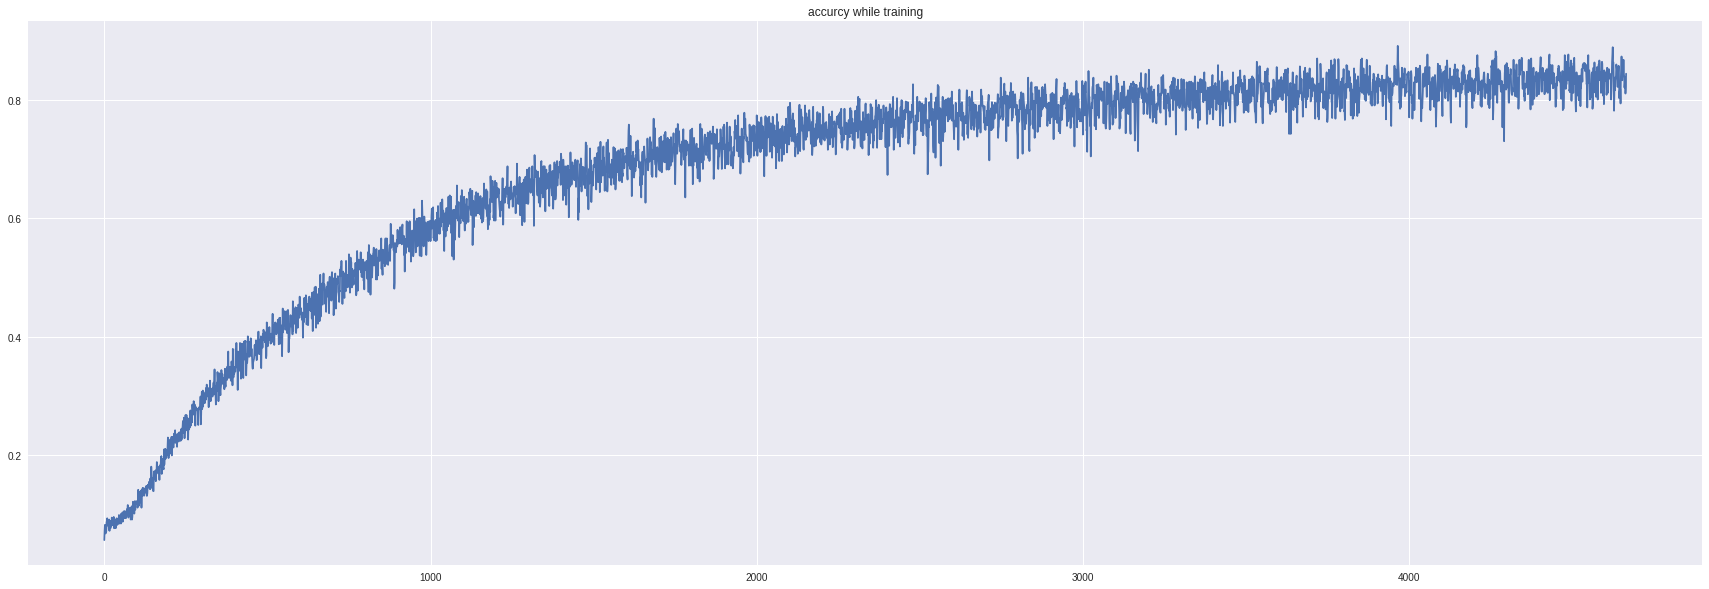

In [792]:
import matplotlib as mpl
mpl.style.use('seaborn')
plt.figure(figsize = (30, 10))
plt.plot(Store_Daily_Customer_Count.history.history['accuracy'], label = 'accuracy')
plt.title("accurcy while training")
plt.show()

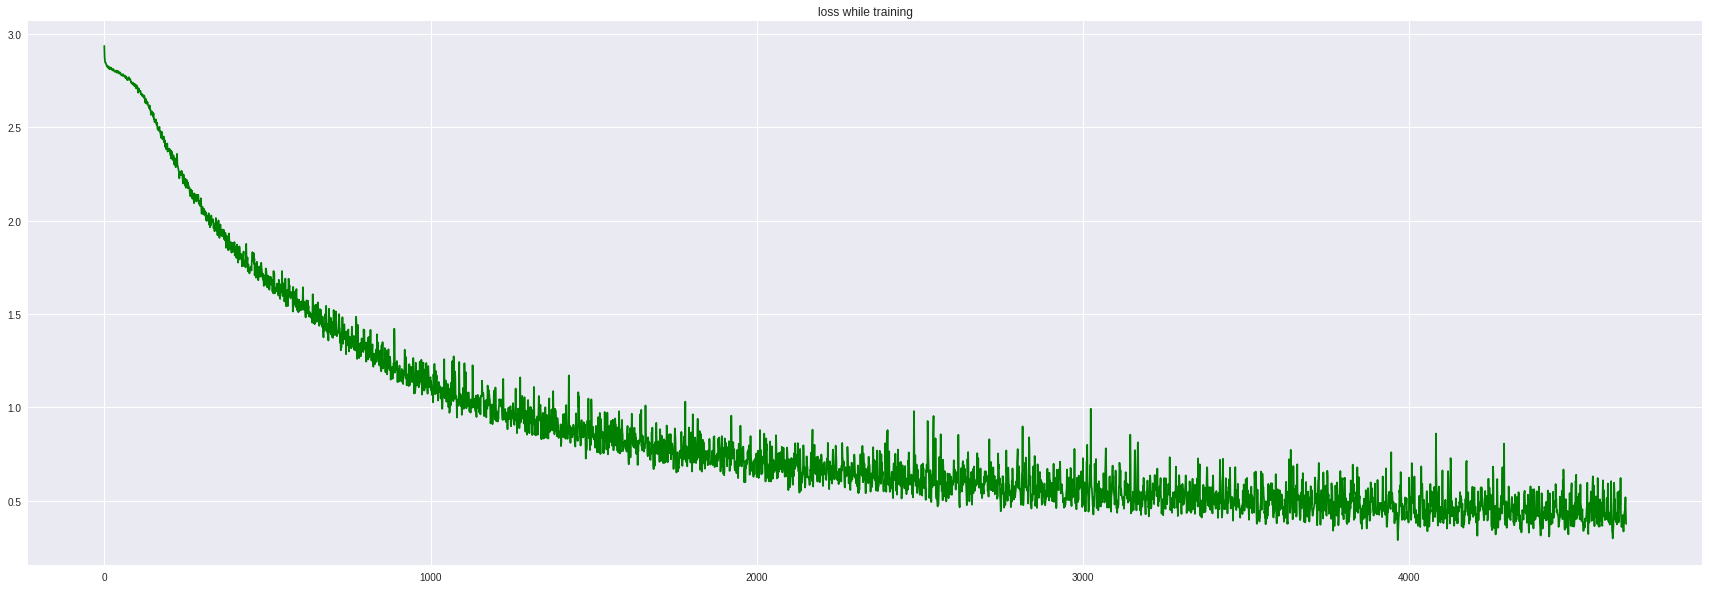

In [794]:
mpl.style.use('seaborn')
plt.figure(figsize = (30, 10))
plt.plot(Store_Daily_Customer_Count.history.history['loss'], 'green')
plt.title("loss while training")
plt.show()

In [770]:
y_pred = Store_Daily_Customer_Count.m.predict(Store_Daily_Customer_Count.features)

In [771]:
y_pred = np.argmax(y_pred, axis = 1)

In [773]:
y_test = np.argmax(Store_Daily_Customer_Count.label, axis = 1)

In [788]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)

0.9453125

In [790]:
c = classification_report(y_test, y_pred)
print(c)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        69
           1       0.93      0.98      0.95        43
           2       0.90      1.00      0.95        43
           3       1.00      0.96      0.98        50
           4       0.96      0.88      0.92        74
           5       0.91      0.91      0.91        11
           6       1.00      1.00      1.00        15
           7       0.96      0.94      0.95        50
           8       0.91      1.00      0.95        41
           9       0.94      0.94      0.94        63
          10       1.00      0.91      0.95        11
          11       0.93      0.97      0.95        68
          12       0.99      0.94      0.96        77
          13       0.90      0.86      0.88        21
          14       0.96      0.90      0.93        50
          15       0.92      0.93      0.93        61
          16       0.98      0.95      0.97        64
          17       1.00    

In [776]:
classes = range(20)
res = tf.math.confusion_matrix(y_pred,y_test).numpy()
cm = pd.DataFrame(res,
                     index = classes, 
                     columns = classes)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,65,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
1,0,42,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
2,1,0,43,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
3,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,65,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,47,0,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,41,0,0,1,0,1,0,1,0,0,0,0
9,0,0,0,0,1,0,0,0,0,59,1,0,1,0,1,0,0,0,0,0


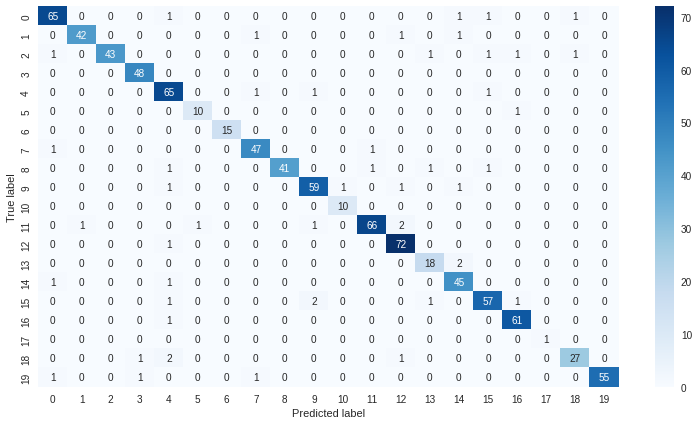

In [780]:
import seaborn as sns
figure = plt.figure(figsize=(13, 7))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()